### Question1

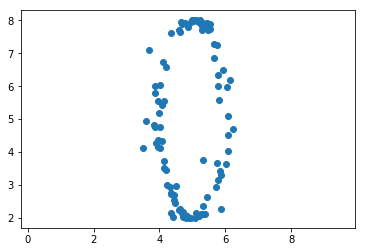

In [55]:
import matplotlib.pyplot
import pylab

x1 = []
x2 = []
content = []

with open("data.txt") as f:
    content = f.readlines()
    content = [x.strip() for x in content] 

for line in content:
    l = line.split(" ")
    x1.append(l[0])
    x2.append(l[1])

matplotlib.pyplot.axis('equal')
matplotlib.pyplot.scatter(x1,x2)
matplotlib.pyplot.show()

### Question2

[]